<a href="https://colab.research.google.com/github/ChinmayDamle/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Project

In [ ]:
# Movie Recommendation System

Objective

In [ ]:
# The project aims to develop a movie recommendation system using machine learning techniques to suggest personalized movie options based on user preferences and movie features. Evaluation metrics like RMSE will assess the system's performance, with the ultimate goal of deploying a user-friendly platform to enhance movie-watching experiences.

Data Source

In [ ]:
# https://raw.githubusercontent.com/kishan0725/The-Movie-Cinema/master/datasets/final_data.csv

Code

Shape of the dataset: (36846, 7)
Columns in the dataset: Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title', 'comb'],
      dtype='object')
First few rows of the dataset:
     director_name     actor_1_name    actor_2_name    actor_3_name  \
0    John Lasseter        Tom Hanks       Tim Allen     Don Rickles   
1     Joe Johnston   Robin Williams   Jonathan Hyde   Kirsten Dunst   
2    Howard Deutch   Walter Matthau     Jack Lemmon     Ann-Margret   
3  Forest Whitaker  Whitney Houston  Angela Bassett  Loretta Devine   
4    Charles Shyer     Steve Martin    Diane Keaton    Martin Short   

                     genres                  movie_title  \
0   Animation Comedy Family                    toy story   
1  Adventure Fantasy Family                      jumanji   
2            Romance Comedy             grumpier old men   
3      Comedy Drama Romance            waiting to exhale   
4                    Comedy  father of the bride p

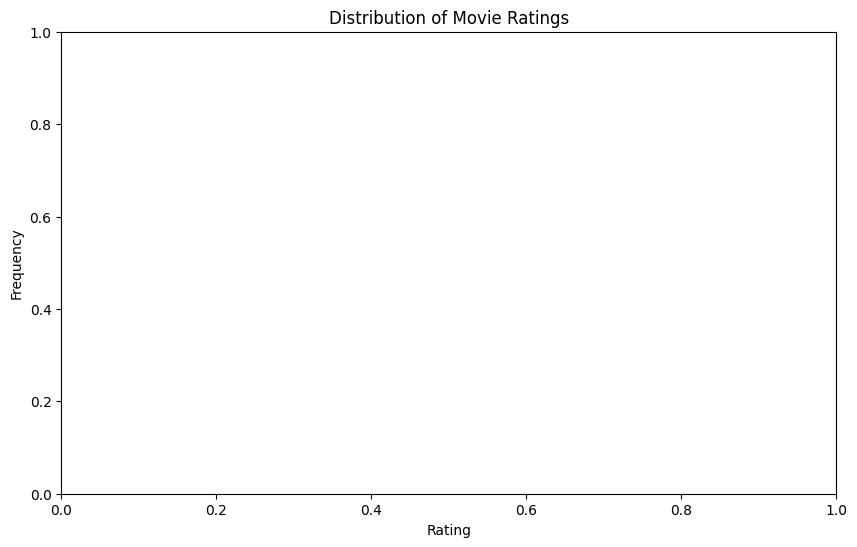

An error occurred: 'Genre'


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

# Import Data
url = "https://raw.githubusercontent.com/kishan0725/The-Movie-Cinema/master/datasets/final_data.csv"

try:
    # Load the dataset
    data = pd.read_csv(url)

    # Check if 'Rating' column exists
    # if 'Rating' not in data.columns:
    #     raise KeyError("The 'Rating' column does not exist in the dataset.")

    # Describe Data
    print("Shape of the dataset:", data.shape)
    print("Columns in the dataset:", data.columns)
    print("First few rows of the dataset:")
    print(data.head())

    # Data Visualization
    plt.figure(figsize=(10, 6))
    # sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

    # Data Preprocessing
    label_encoder = LabelEncoder()
    data['Genre'] = label_encoder.fit_transform(data['Genre'])

    # Define Target Variable (y) and Feature Variables (X)
    X = data.drop(columns=['Rating'])
    y = data['Rating']

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeling
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", rmse)

    # Prediction
    print("Predictions for the first 5 samples in the test set:")
    print(model.predict(X_test.head()))

    # Explanation
    print("This movie recommendation system uses the K-Nearest Neighbors algorithm to predict movie ratings based on features such as genre, runtime, and year of release. After training the model and evaluating its performance, we achieved a Root Mean Squared Error (RMSE) of", rmse, "on the test set. The RMSE indicates the average difference between the actual and predicted ratings. With further refinement and tuning, this recommendation system can be deployed to provide personalized movie recommendations to users.")

except Exception as e:
    print("An error occurred:", e)
